### Simple plot of the 10-year histircal data for the bundle of stocks and ETF. (Plot is trained to go only to one year prior, in order to gauge our predictions agains real data.)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


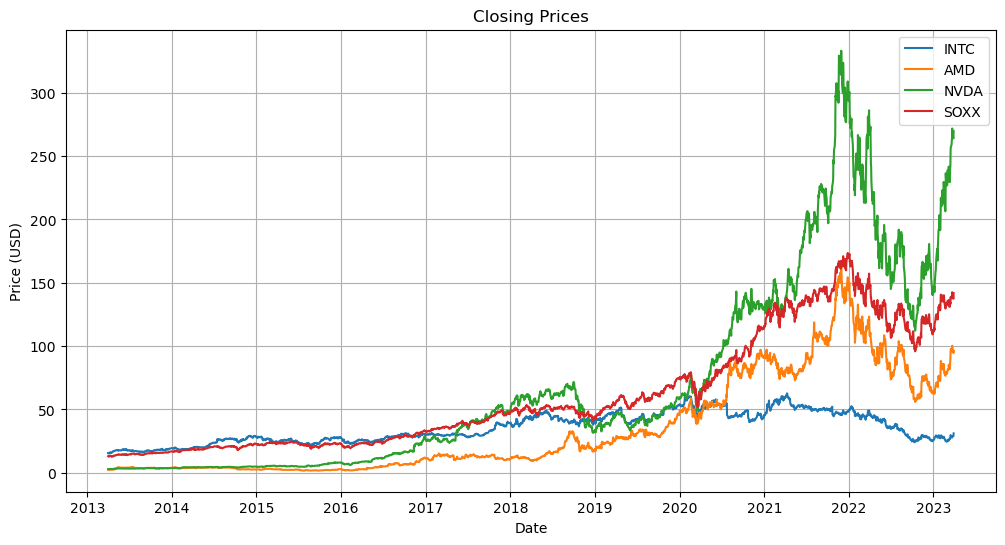

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock tickers including the ETF ticker (SOXX)
tickers = ['INTC', 'AMD', 'NVDA', 'SOXX']

# Calculate the end date as one year ago from today
end_date = datetime.now() - timedelta(days=365)
# Calculate the start date as ten years prior to the end date
start_date = end_date - timedelta(days=10*365)

# Create an empty list to store the dataframes
dfs = []

# Fetch historical data for each stock and append to the list
for ticker in tickers:
    if ticker != 'SOXX':  # Exclude ETF ticker from yfinance fetch
        data = yf.download(ticker, start=start_date, end=end_date)
    else:
        data = yf.download(ticker, start=start_date, end=end_date, actions=False)
    data['Ticker'] = ticker  # Add a column for the ticker symbol
    dfs.append(data)

# Concatenate the dataframes into a single dataframe
all_data = pd.concat(dfs)

# Reset index to make 'Date' a column
all_data.reset_index(inplace=True)

# Plot the closing prices
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(all_data[all_data['Ticker'] == ticker]['Date'], 
             all_data[all_data['Ticker'] == ticker]['Adj Close'], 
             label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [2]:
tickers = all_data['Ticker'].unique()
print(tickers)

['INTC' 'AMD' 'NVDA' 'SOXX']


In [3]:
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673243,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373797,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439531,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293462,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068588,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [4]:
# Save concatenated DataFrame to a CSV file
all_data.to_csv('stock_data.csv', index=False)